# Introduction

In this notebook, we will perform text detection in images using OCR. We will start with image preprocessing and then conduct OCR using Tesseract, EasyOCR, and KerasOCR. By the end of this notebook, you will understand how to enhance image quality for OCR and extract text effectively from images.



# Install and Import Libraries

In [1]:
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,498 kB]

In [2]:
!pip install pytesseract
!pip install easyocr
!pip install keras-ocr

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
import cv2
import pytesseract
import easyocr
import keras_ocr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Image Preprocessing

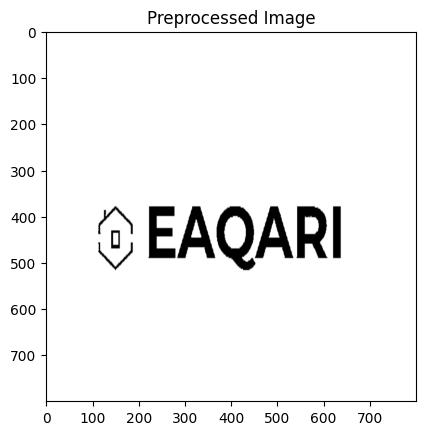

In [5]:
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
import cv2

def preprocess_image(image_path):
    # Load image
    image = Image.open('/content/شعار الموقع.jpeg')

    # Convert image to grayscale
    gray_image = image.convert('L')

    # Enhance sharpness
    enhancer = ImageEnhance.Sharpness(gray_image)
    enhanced_image = enhancer.enhance(2)

    # Apply thresholding
    threshold_image = enhanced_image.point(lambda p: p > 140 and 255)

    # Optionally, resize the image
    resized_image = threshold_image.resize((800, 800))

    return resized_image

# Example usage
image_path = 'sample_image.png'  # Replace with your image path
preprocessed_image = preprocess_image(image_path)

# Display the preprocessed image
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


# Text Detection using Tesseract

Draw Bounding Boxes

In [7]:
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

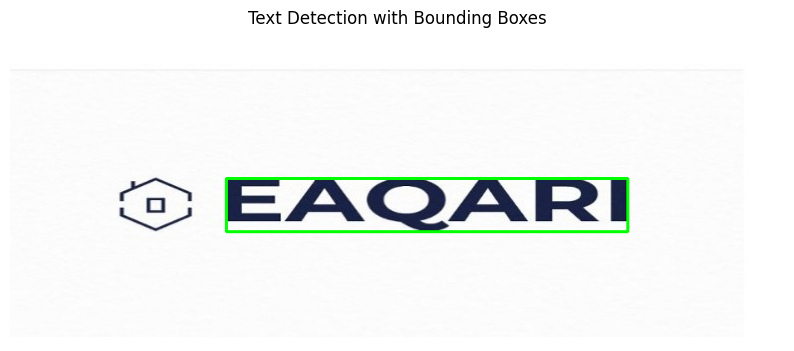

In [9]:
# Load the image
image_path = '/content/شعار الموقع.jpeg'   path
image = cv2.imread(image_path)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


data = pytesseract.image_to_data(gray_image, output_type=pytesseract.Output.DICT)


n_boxes = len(data['text'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 60:  # Confidence threshold
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title("Text Detection with Bounding Boxes")
plt.axis('off')
plt.show()

Extract text

In [14]:
    extracted_text = pytesseract.image_to_string(gray_image)
    print("Extracted Text:\n")
    print(extracted_text)

Extracted Text:

a EAQARI



# Text Detection using EasyOCR

Print the detected words

In [15]:
reader = easyocr.Reader(['en']) # read word only this is work code

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Draw bounding box

In [16]:
image_path = '/content/شعار الموقع.jpeg'
image = cv2.imread(image_path)

result = reader.readtext(image)

print (result)

[([[213, 135], [626, 135], [626, 207], [213, 207]], 'EAQARI', 0.9981905826187495)]


In [17]:
for detection in result:
    print(detection[1])

EAQARI


# Text Detection using KerasOCR

Print the detected words

In [18]:
import keras_ocr

In [19]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [22]:
image_path = '/content/شعار الموقع.jpeg'

image = keras_ocr.tools.read(image_path)


images = [image]


prediction_groups = pipeline.recognize(images)


for predictions in prediction_groups:
    for prediction in predictions:
        print(prediction[0])

1/1 [==============================] - 0s 264ms/step
eaqari


Draw bounding box

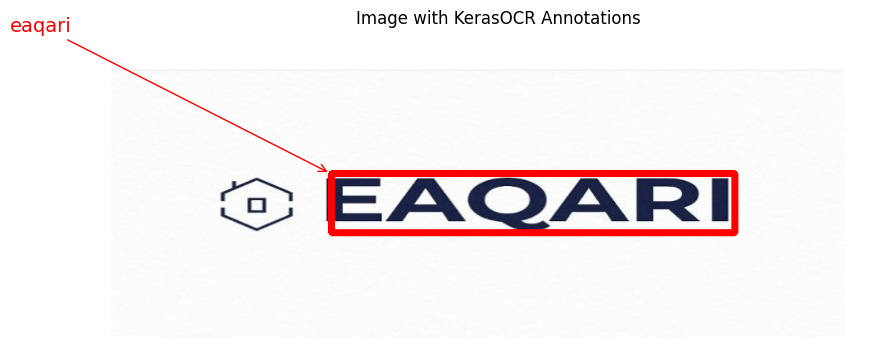

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)


plt.title("Image with KerasOCR Annotations")
plt.axis('off')
plt.show()